<a href="https://colab.research.google.com/github/wilmanAQ/AED/blob/main/Taller1_exploraciondata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
import pandas as pd
import google.colab as drive
import numpy as np

import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import altair as alt
from pandas.core import missing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns   ## Libreria para visualizar
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas


In [385]:
datos = '/content/drive/MyDrive/Colab Notebooks/Analisis_exploratorio_datos/dataset_fumadores1.xlsx'
headers = ["edad","sexo","imc","hijos","fumador", "region","costo"]
data = pd.read_excel(datos, names=headers)


**1. Contexto del análisis.**
La compañía de seguros de salud para la que trabajo. Quiere entender mejor cómo la competencia estima los costos para los seguros de la población fumadora. Me han pedido que investigar algunos datos históricos de la competencia para comprender qué características de la población fumadora resultan claves para nuestra compañía.


**2.Pregunta SMART.** Problema de negocio. Se quiere dar respuesta a la siguiente pregunta ¿**Cuál es el perfil de las personas fumadoras en relación con el costo de su seguro de salud, su región geográfica donde viven y sus características personales?**

3.Descripción de los datos incluyendo para cada columna: Variable: nombre de la variable. El conjunto de datos de las personas fumadora, tienen los siguientes atributos:

-**edad:** La edad de la persona, en años.

-**sexo:** Masculino o femenino.

-**imc:** El Índice de Masa Corporal (IMC) de la persona.

-**hijos:** el número de hijos que tiene la persona.

-**fumador:** Si la persona es fumadora o no.

-**región:** Noreste, noroeste, sureste, suroeste.

-**costo:** El costo del seguro de salud de esa persona.

-Tipo: tipo del formato de la variable. categórica, numérica, Booleana.


***Contexto***: información útil para entender el espacio semántico. 

Los datos que emplearemos para trabajar en este análisis son de carácter público, son de personas fumadoras, el costo de su seguro de vida, la región donde habitan y características personales. Todos los datos se encuentran en un archivo de Excel dataset_fumadores.xlsx.


***Expectativa***: ¿Por qué es importante esta variable para mi problema? 

Se espera conocer las características de las personales fumadoras, el costo de su seguro de vida y la región geográfica donde habitan.

***Importancia***:

Analizar a la competencia para entender como estima los costos para los seguros de la población fumadora.

#Análisis general del dataset fumadores:

-	***Forma y tamaño del dataset fumadores***: 
 
  El tamaño y la forma es (1338, 7)

- ***Evaluación de los nombres de las variables***:

Los nombres de las variables hacen referencia a la información que está en el dataset fumadores. No se encuentra incoherencia en los atributos, es decir la información es confiable e integra. 
- ***Revisión de los tipos de variables***:

En la revisión de los tipos de variables se pudo evidenciar los siguientes tipos de variables:  ***Object, Int64, Float64***
- **edad**    float64
- **sexo**    Object
- **imc**     float64
- **hijos**   int64
- **Fumador** Object
- ***Región** Object
- ***Costo*** float

#Análisis Unitario :

-	**Identificar Valores Nulos**.

No hay valores nulos en la dataset fumadores.

-**Analizar los Valores únicos de las variables discretas**.

Las variables variables que tienen valores único son **sexo**= 2, **fumador**=2 y **región**=4.

Las variables top **sexo**= masculino, **fumador**= no, **region**= surest


-**Analizar la distribución de las variables continuas**.

-**Evaluar la necesidad de usar Label encoding y/o  hot-encoding**
Se encontró la necesidad de aplicar hot-encoding a las variables sexo, región y fumador. Ya que estas son variables cualitativas nominal y, no se puede aplicar un orden especifico


In [386]:
data.head(5)

,edad,sexo,imc,hijos,fumador,region,costo
0,19,femenino,27.900,0,si,suroeste,16884.92400
1,18,masculino,33.770,1,no,sureste,1725.55230
2,28,masculino,33.000,3,no,sureste,4449.46200
3,33,masculino,22.705,0,no,noroeste,21984.47061
4,32,masculino,28.880,0,no,noroeste,3866.85520


#Tipos de datos

Tenemos en nuestro conjunto de dataos varios atributos indexados, los cúales son **sexo, fumador, región**. 

In [387]:
print(data.dtypes)

edad         int64
sexo        object
imc        float64
hijos        int64
fumador     object
region      object
costo      float64
dtype: object


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   imc      1338 non-null   float64
 3   hijos    1338 non-null   int64  
 4   fumador  1338 non-null   object 
 5   region   1338 non-null   object 
 6   costo    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [389]:
data.info

<bound method DataFrame.info of       edad       sexo     imc  hijos fumador    region        costo
0       19   femenino  27.900      0      si  suroeste  16884.92400
1       18  masculino  33.770      1      no   sureste   1725.55230
2       28  masculino  33.000      3      no   sureste   4449.46200
3       33  masculino  22.705      0      no  noroeste  21984.47061
4       32  masculino  28.880      0      no  noroeste   3866.85520
...    ...        ...     ...    ...     ...       ...          ...
1333    50  masculino  30.970      3      no  noroeste  10600.54830
1334    18   femenino  31.920      0      no   noreste   2205.98080
1335    18   femenino  36.850      0      no   sureste   1629.83350
1336    21   femenino  25.800      0      no  suroeste   2007.94500
1337    61   femenino  29.070      0      si  noroeste  29141.36030

[1338 rows x 7 columns]>

#Descripción de los datos

Se necesita saber el resumen estadístico de las columna de tipo numérico (Int, Float), de nuestro conjunto de datos.

In [390]:
data.describe()

,edad,imc,hijos,costo
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Descripción de los datos incluendo las variales **Object**.

Se quíere observar totas las columnas del conjunto de datos, así que vamos a realizar análisis descritivo sobre las variable de tipo object, int y float. 
Verémos cuánto valores único existen, cuál es le valor top (la moda), y la frecuencia del valor top de la columnas **Object**

In [391]:
data.describe(include='all')

,edad,sexo,imc,hijos,fumador,region,costo
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,masculino,NaN,NaN,no,sureste,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [392]:
data['edad'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: edad, dtype: float64

In [393]:
data['sexo'].describe()

count          1338
unique            2
top       masculino
freq            676
Name: sexo, dtype: object

#Identificar y manejar valores perdidos
## **1. Identificando valores perdidos**

Los valores perdidos en un conjunto de datos se presentan así **?** y debemos cambiarlos a **NaN**. Se debe importar la libreria **numpy**.

En nuestro caso no tenemos valores perdidos en nuestro conjunto de datos, pero cuanto estos se presente se debe utilizar la siguiente instrucción:

**data.replace("?", np.nan, inplace = true)**

In [394]:
data.head(4)

,edad,sexo,imc,hijos,fumador,region,costo
0,19,femenino,27.900,0,si,suroeste,16884.92400
1,18,masculino,33.770,1,no,sureste,1725.55230
2,28,masculino,33.000,3,no,sureste,4449.46200
3,33,masculino,22.705,0,no,noroeste,21984.47061


## **2. Evaluar los datos perdidos**

Despúes de haber convertido en el paso anterio los datos perdidos a los valores predeterminado de Python, se debe utilizar las funciones integrada de python para así poder idntificar esto datos perdidos.  ***HAY TRES METODO PARA IDENTIFICAR VALOR PERDIDOS**

-.isnull()

-.notnul()

-.isna()

Las salidas de estas funciones es un valor booleano que no indica si el valor que se pasa en los argumentos en un dato perdido.

# En nuestro caso no tenemos valores perdidos

In [395]:
missing_data = data.isnull()
missing_data.head(5)

,edad,sexo,imc,hijos,fumador,region,costo
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


# **3. Contar los valores perdidos de cada columna**

En nuestro caso confirmamos que no tenemos datos perdidos en el conjunto de datos.

In [396]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")


edad
False    1338
Name: edad, dtype: int64

sexo
False    1338
Name: sexo, dtype: int64

imc
False    1338
Name: imc, dtype: int64

hijos
False    1338
Name: hijos, dtype: int64

fumador
False    1338
Name: fumador, dtype: int64

region
False    1338
Name: region, dtype: int64

costo
False    1338
Name: costo, dtype: int64



## Tambien podemos mirar el resumen de los valores perdidos para los atributos del conjunto de datos.

In [397]:
data.isna().sum()

edad       0
sexo       0
imc        0
hijos      0
fumador    0
region     0
costo      0
dtype: int64

#Lidiar con los valores perdidos

Cuando tenemos un dataset con valores perdidos, podemos tomar las siguientes decisiones:

.Eliminar datos

.Eliminar toda la fila

.Eliminar toda la columna

.Reemplazar datos

.Reemplazar por la media (o promedio)

.Reemplazar por la frecuencia

.Reemplazar en función de otras funciones

**Debemos tener cuenta que una columna entera se puede descartar solo si la mayoría de sus valores están vacíos**. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo, 

*REEMPLAZAR POR LA MEDIA:*

Nota: En nuestro conjunto de datos no debemos remplazar ningún dato.

In [398]:
# Promedio/media de la columna perdida-promedio-anual
#avg_perdida_promedio_anual = data["column1"].astype("float").mean()

# Promedio/media de la columna carrera
#avg_carrera = data[""column1""].astype("float").mean()

# Promedio/media de la columna calibre
#avg_calibre = data[""column1""].astype("float").mean()

# Imprimir los resultados 
#print("Promedio de perdida-promedio-anual:", avg_perdida_promedio_anual)
#print("Promedio de carrera:", avg_carrera)
#print("Promedio de calibre:", avg_calibre)

Luego, reemplazamos "NaN" por el valor promedio de la columna donde deseamos hacer el reemplazo. Veamos el reemplazo para las tres columnas anteriores, utilizando el método replace():

In [399]:
# Reemplazo de NaN por la media, columna perdida-promedio-anual
#data[""column1""].replace(np.nan, avg_perdida_promedio_anual, inplace=True)

# Reemplazo de NaN por la media, columna carrera
#data[""column1""].replace(np.nan, avg_carrera, inplace=True)

# Reemplazo de NaN por la media, columna bore
#data[""column1""].replace(np.nan, avg_calibre, inplace=True)

**REEMPLAZAR POR LA FRECUENCIA:**

"num-puertas". En este caso la frecuencia es "four" porque el 84% de los automóviles son de cuatro puertas, por lo tanto cuatro puertas es más frecuente y es más probable que ocurra.

Para observar la frecuencia, podemos ver qué valores están presentes en una columna en particular empleando el método .value_counts():

In [400]:
#obteniendo la frecuencia
#data['column1'].value_counts()


.idxmax() para calcular el tipo más común automáticamente:

In [401]:
#data['column1'].value_counts().idxmax()
# Reemplazar los valores perdidos de'num-puertas' por el valor más frecuente 
#data["column1"].replace(np.nan, "four", inplace=True)

*ELIMINAR TODA LA FILA:*

In [402]:
# Elimine la fila/instancia completa que tiene valor NaN en la columna "precio" 
#data.dropna(subset=["precio"], axis=0, inplace=True)

# Restablezca el índice del dataframe porque se eliminaron dos filas
#data.reset_index(drop=True, inplace=True)
#verificamos Verifiquemos nuevamente cuántos valores perdidos tiene el conjunto de datos
#data.isna().sum() 

##Corregir formato de datos##

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto **(int, float, text u otro)**. En pandas utilizamos los métodos: **.dtype()** para ver los tipos de datos, y **.astype()** para cambiar tipos de datos.

Veamos los tipos de datos para cada columna:

In [403]:
data.dtypes

edad         int64
sexo        object
imc        float64
hijos        int64
fumador     object
region      object
costo      float64
dtype: object

In [404]:
#Cambiamos los formatos de los atributos  
#data[["edad"]] = data[["edad"]].astype("int")
#data[["imc"]] = data[["imc"]].astype("float")
#data[["hijos"]] = data[["hijos"]].astype("int")
#data[["costo"]] = data[["costo"]].astype("float")

##Estandarización de los tipo de datos

Qué es estandarización?

Es el proceso de transformar los datos en un formato común que nos permita hacer una comparación con sentido.

La fórmula para la conversión es: L/100km = 235 / mpg

**NOTA: En nuestro conjunto de datos no tenemos una columna que debamos estandariza**

In [405]:
# Este es un ejemplo. debemos terner en cuenta las unidades o formato de nuestro conjunto de datos.
# Convertir mpg a L/100km con una operación matemática (235 dividido por mpg)
#data['column'] = 235/data["column"]

# Verifiquemos las columnas para visualizar la transformación de los datos 
#data.head()

#Normalización de los datos

## **¿Qué es la normalización?** 

Es el proceso de transformar valores de varias variables a un rango similar. Dentro de las normalizaciones típicas se incluyen: escalar la variable de tal manera que su promedio sea 0, escalar la variable para que la varianza sea 1, o escalar la variable para que los valores de la variable oscilen entre 0 y 1.


Objetivo: Normalizar esas variables para que su valor oscile entre 0 y 1.

Enfoque: Reemplazar el valor original por (valor original)/(valor máximo)

In [406]:
# Normalizamos los atributos para que queden entre 0 y 1
data['edad'] = data['edad']/data['edad'].max()
data['imc'] = data['imc']/data['imc'].max()
data['costo'] = data['costo']/data['costo'].max()
data['hijos'] = data['hijos']/data['hijos'].max()

In [407]:
data.head(5)

,edad,sexo,imc,hijos,fumador,region,costo
0,0.296875,femenino,0.525127,0.0,si,suroeste,0.264777
1,0.281250,masculino,0.635611,0.2,no,sureste,0.027059
2,0.437500,masculino,0.621118,0.6,no,sureste,0.069773
3,0.515625,masculino,0.427348,0.0,no,noroeste,0.344744
4,0.500000,masculino,0.543572,0.0,no,noroeste,0.060637


# **Discretizar valores**

Es el proceso de transformar variables numéricas continuas en discretas categóricas.

**En nuestro conjunto de datos no tenemos una variable numérica continua, que debamos convertir en una variable discreta categória.**



# **Variable indicadora (o variable ficticia)**

**¿Qué es una variable indicadora?**

Es una variable numérica que se utiliza para etiquetar categorías. Se les llama "ficticias" porque los números en sí no representan una cantidad y por lo tanto no tienen un significado inherente.


In [408]:
dummy_variable_1 = pd.get_dummies(data["sexo"])
dummy_variable_1.head(5)

,femenino,masculino
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [409]:
dummy_variable_1.rename(columns={'femenino':'genero-femenino', 'masculino':'genero-masculino'}, inplace=True)
dummy_variable_1.head(5)

,genero-femenino,genero-masculino
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


##One_hot_encodign

In [410]:
print(data.info)

<bound method DataFrame.info of           edad       sexo       imc  hijos fumador    region     costo
0     0.296875   femenino  0.525127    0.0      si  suroeste  0.264777
1     0.281250  masculino  0.635611    0.2      no   sureste  0.027059
2     0.437500  masculino  0.621118    0.6      no   sureste  0.069773
3     0.515625  masculino  0.427348    0.0      no  noroeste  0.344744
4     0.500000  masculino  0.543572    0.0      no  noroeste  0.060637
...        ...        ...       ...    ...     ...       ...       ...
1333  0.781250  masculino  0.582910    0.6      no  noroeste  0.166230
1334  0.281250   femenino  0.600791    0.0      no   noreste  0.034593
1335  0.281250   femenino  0.693582    0.0      no   sureste  0.025558
1336  0.328125   femenino  0.485601    0.0      no  suroeste  0.031487
1337  0.953125   femenino  0.547149    0.0      si  noroeste  0.456973

[1338 rows x 7 columns]>


In [411]:
#Creando el objeto
onehotencoder = OneHotEncoder()

In [412]:
#reshape the 1-D sexo array to 2-D as fit_transform expects 2-D and finally fit the object 

S = onehotencoder.fit_transform(data.sexo.values.reshape(-1,1)).toarray()

S

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [413]:
dataOneHotS = pd.DataFrame(S, columns = ["sexo"+str(int(i)) for i in range(S.shape[1])]) 

In [414]:
data = pd.concat([data, dataOneHotS], axis=1)
data

,edad,sexo,imc,hijos,fumador,region,costo,sexo0,sexo1
0,0.296875,femenino,0.525127,0.0,si,suroeste,0.264777,1.0,0.0
1,0.281250,masculino,0.635611,0.2,no,sureste,0.027059,0.0,1.0
2,0.437500,masculino,0.621118,0.6,no,sureste,0.069773,0.0,1.0
3,0.515625,masculino,0.427348,0.0,no,noroeste,0.344744,0.0,1.0
4,0.500000,masculino,0.543572,0.0,no,noroeste,0.060637,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,0.781250,masculino,0.582910,0.6,no,noroeste,0.166230,0.0,1.0
1334,0.281250,femenino,0.600791,0.0,no,noreste,0.034593,1.0,0.0
1335,0.281250,femenino,0.693582,0.0,no,sureste,0.025558,1.0,0.0
1336,0.328125,femenino,0.485601,0.0,no,suroeste,0.031487,1.0,0.0


In [415]:
data= data.drop(['sexo'], axis=1) 
data.head(5)

,edad,imc,hijos,fumador,region,costo,sexo0,sexo1
0,0.296875,0.525127,0.0,si,suroeste,0.264777,1.0,0.0
1,0.281250,0.635611,0.2,no,sureste,0.027059,0.0,1.0
2,0.437500,0.621118,0.6,no,sureste,0.069773,0.0,1.0
3,0.515625,0.427348,0.0,no,noroeste,0.344744,0.0,1.0
4,0.500000,0.543572,0.0,no,noroeste,0.060637,0.0,1.0


In [416]:
#reshape the 1-D fumador array to 2-D as fit_transform expects 2-D and finally fit the object 

F = onehotencoder.fit_transform(data.fumador.values.reshape(-1,1)).toarray()
F

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [417]:
dataOneHotF = pd.DataFrame(F, columns = ["fumador"+str(int(i)) for i in range(F.shape[1])]) 

In [418]:
data = pd.concat([data, dataOneHotF], axis=1)
data.head(5)

,edad,imc,hijos,fumador,region,costo,sexo0,sexo1,fumador0,fumador1
0,0.296875,0.525127,0.0,si,suroeste,0.264777,1.0,0.0,0.0,1.0
1,0.281250,0.635611,0.2,no,sureste,0.027059,0.0,1.0,1.0,0.0
2,0.437500,0.621118,0.6,no,sureste,0.069773,0.0,1.0,1.0,0.0
3,0.515625,0.427348,0.0,no,noroeste,0.344744,0.0,1.0,1.0,0.0
4,0.500000,0.543572,0.0,no,noroeste,0.060637,0.0,1.0,1.0,0.0


In [419]:
data= data.drop(['fumador'], axis=1) 


In [420]:
#reshape the 1-D fumador array to 2-D as fit_transform expects 2-D and finally fit the object 
R = onehotencoder.fit_transform(data.region.values.reshape(-1,1)).toarray()
R

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [421]:
dataOneHotR = pd.DataFrame(R, columns = ["region"+str(int(i)) for i in range(R.shape[1])]) 

In [422]:
data = pd.concat([data, dataOneHotR], axis=1)


In [423]:
data.head(5)

,edad,imc,hijos,region,costo,sexo0,sexo1,fumador0,fumador1,region0,region1,region2,region3
0,0.296875,0.525127,0.0,suroeste,0.264777,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.281250,0.635611,0.2,sureste,0.027059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.437500,0.621118,0.6,sureste,0.069773,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.515625,0.427348,0.0,noroeste,0.344744,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,0.543572,0.0,noroeste,0.060637,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [424]:
data= data.drop(['region'], axis=1) 


In [425]:
data.head(5)

,edad,imc,hijos,costo,sexo0,sexo1,fumador0,fumador1,region0,region1,region2,region3
0,0.296875,0.525127,0.0,0.264777,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.281250,0.635611,0.2,0.027059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.437500,0.621118,0.6,0.069773,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.515625,0.427348,0.0,0.344744,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,0.543572,0.0,0.060637,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [426]:
data.describe(include='all')

,edad,imc,hijos,costo,sexo0,sexo1,fumador0,fumador1,region0,region1,region2,region3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.612610,0.577139,0.218984,0.208097,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,0.219531,0.114779,0.241099,0.189900,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,0.281250,0.300395,0.000000,0.017592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421875,0.494942,0.000000,0.074334,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.609375,0.572181,0.200000,0.147122,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.796875,0.652997,0.400000,0.260935,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Análisis descritivo 

En el resumen estadistíco se observa que el promedio de las personas fuamdora es 20%, de las no fumadoras es 80%, con desviación estándar de 0.40, que la edad promedio entre las personas fumadoras es 61 años, las edad minima de la persona fumadora mas joven es de 28 años y la mayor es 100 años. El 25% de las personas tiene una edad 28 años, el 50% de la personas fumadora tienen en 28 y 60 años, el otro 50% esta comprendiso entre 60 a 100 años. El 75% de los fumadores tienen 79 años o más. El 20% de los fumadores habitan en el suroeste. el promedio de los hombre fumadores es 49.4%.

# Análisi de variables contínua

In [427]:
data['edad'].describe()

count    1338.000000
mean        0.612610
std         0.219531
min         0.281250
25%         0.421875
50%         0.609375
75%         0.796875
max         1.000000
Name: edad, dtype: float64

In [428]:
data['hijos'].describe()

count    1338.000000
mean        0.218984
std         0.241099
min         0.000000
25%         0.000000
50%         0.200000
75%         0.400000
max         1.000000
Name: hijos, dtype: float64

In [429]:
tabla_descriptivas=pd.DataFrame(data[['edad','hijos']].describe())
tabla_descriptivas

,edad,hijos
count,1338.000000,1338.000000
mean,0.612610,0.218984
std,0.219531,0.241099
min,0.281250,0.000000
25%,0.421875,0.000000
50%,0.609375,0.200000
75%,0.796875,0.400000
max,1.000000,1.000000


In [430]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [431]:
fun_tabla_descriptivas(data['edad'])

,edad
count,1338.000000
mean,0.612610
std,0.219531
min,0.281250
25%,0.421875
50%,0.609375
75%,0.796875
max,1.000000
coef. variation,0.358353
skew,0.055610


#Descripción de la variable continua **"edad"**


En el resumen estadístico se observa que la edad promedio de la personas fumadoras es 61 años. De esta manera, podríamos concluir que la distribución parece que es simétrica.

La edad minima de los fumadores es de 28 años, el 25% de los fumadores tienen 42 año, el 50% de los fumadores tienen edad entre 28 y 60 años, y el otro 50% esta entre 60 y 100 años. el 75% de los fumadores tienen 79 años o más.

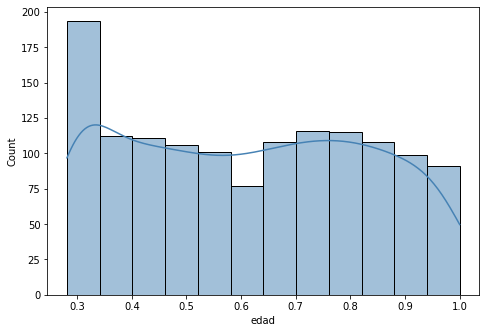

In [432]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=data['edad'],kde=True,color="steelblue")
plt.show() 